Importing the necessary libraries

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import datetime
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

Reading the csv file containing the population values in Jamaica since 1950

In [2]:
df = pd.read_csv('jampop.csv')

Ensuring that the date column is in the appropriate format and removing irrelevant columns


In [3]:
df["date"] = pd.to_datetime(df["date"])



Converting the dataframe into a time series and creating a duplicate time series which will be used in the forecasting

In [4]:
timeseries = df.set_index('date')
timeseries_2 = timeseries


Visualizing the original time series

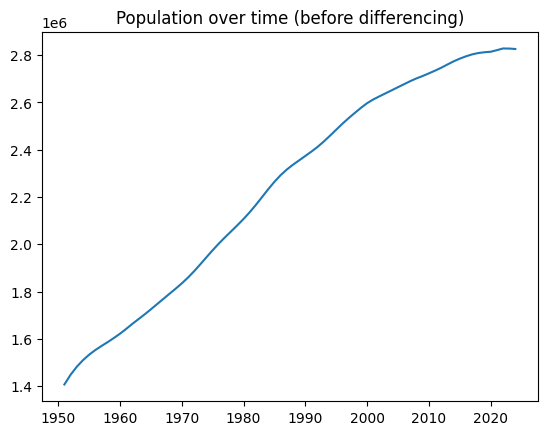

In [5]:
plt.plot(timeseries)
plt.title('Population over time (before differencing)')
plt.show()

Testing if the timeseries is stationary


In [6]:
is_stationary = adfuller(timeseries)

if(is_stationary[1])<= 0.05:
  print ("Stationary")
else:
  print ("Not stationary")

Not stationary


The time series was not stationary so differencing is done to make it so.



In [7]:
diff_count = 0
while True:
    dftest = adfuller(timeseries, autolag='AIC')
    if dftest[1] < 0.05:
        print("Time Series is Stationary")
        break
    else:
        timeseries = timeseries.diff()
        timeseries.dropna(inplace=True)
        diff_count += 1
        print(f"(Total differences: {diff_count})")

print("Time series is now stationary.")


(Total differences: 1)
(Total differences: 2)
Time Series is Stationary
Time series is now stationary.


Using the Partial Autocorrelation function to find the p value

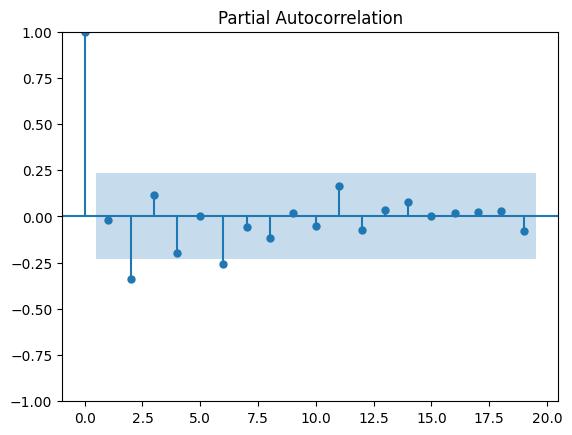

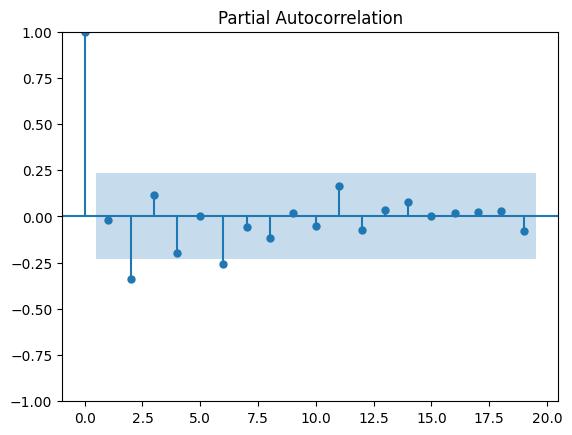

In [8]:
plot_pacf(timeseries.Population.diff().dropna())


Using the Autocorrelation function to find the q value

/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


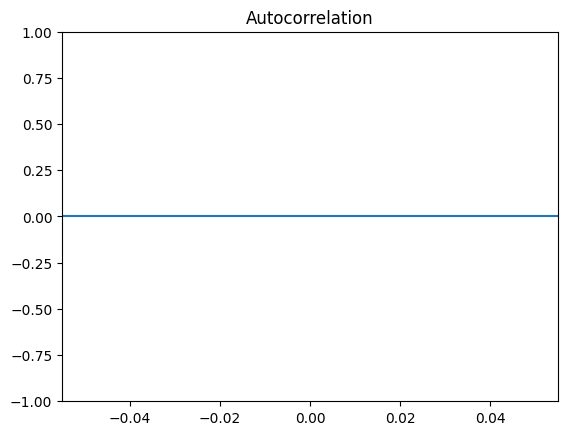

In [9]:
plot_acf(timeseries.Population.diff());


Visualizing the differenced time series. It resembles white noise which means it is more fit for forecasting

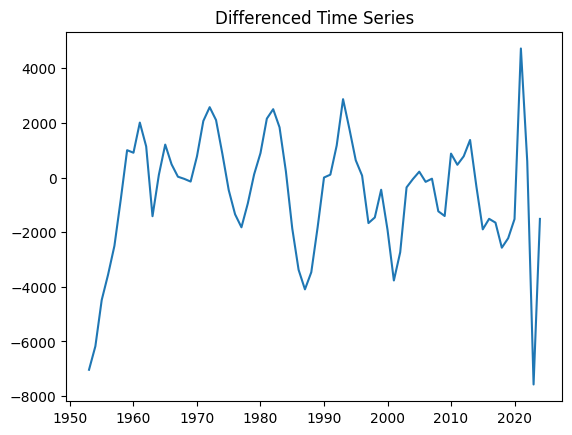

In [10]:


plt.plot(timeseries)
plt.title('Differenced Time Series')
plt.show()


Here, we build the ARIMA model, and predict the populatoin for 2024

In [11]:
model = ARIMA(timeseries_2, order=(2, 2, 0))
results = model.fit()

future_year = 2024
forecast = results.get_forecast(steps=1)
predicted_population = forecast.predicted_mean[0]

print(f'Predicted Population for {future_year}: {predicted_population}')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)


Predicted Population for 2024: 2823628.423751407
